In [1]:
%reset -f
%connect_info

{
  "shell_port": 57909,
  "iopub_port": 47093,
  "stdin_port": 46205,
  "control_port": 37647,
  "hb_port": 51827,
  "ip": "127.0.0.1",
  "key": "0ba08366-00dea7cc611b56727a80d291",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-ca285b67-44e3-442a-8255-3227b3fc94df.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

2021-12-21 12:06:23.398988: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-21 12:06:23.399024: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
classes_values = ['beer',
                  'coffee',
                  'orange'
                  ]

In [4]:
#########################
## set the paths and load data
#########################
path_base = "/home/trix_arch/IIVspace/DataSc/"+\
            "DataCamp2021/DSR_B28_work/DSR28_portfolio_project/"+\
            "Measurements_n_Tests/GGS_arduino_readings/GGSv2I_complete/"
path_add_folder2readmodel = "tf_models/"
model_filename = 'model_c5_n36d02n24d02_mk1'

In [5]:
#########################
## Load into a new model
#########################
model_ff = tf.keras.models.load_model((path_base + path_add_folder2readmodel + model_filename))

# Check its architecture
model_ff.summary()

2021-12-21 12:06:26.020792: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-21 12:06:26.020864: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-21 12:06:26.020890: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ASTRAxfce): /proc/driver/nvidia/version does not exist


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 36)                252       
_________________________________________________________________
dropout_6 (Dropout)          (None, 36)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 24)                888       
_________________________________________________________________
dropout_7 (Dropout)          (None, 24)                0         
_________________________________________________________________
y_pred (Dense)               (None, 3)                 75        
Total params: 1,215
Trainable params: 1,215
Non-trainable params: 0
_________________________________________________________________


In [12]:
#########################
## Lets predict
#########################
#### The values are taken from "classification_tf_train_model1_01.ipynb"

# Values_Train: [[728 642 540 210  25  34]]
# Label_Train:  [[0. 1. 0.]]
# Label_Text:   [['coffee']]
data2predictArr = np.array([[728, 642, 540, 210,  25,  34]])

# Values_Test: [[548 153 514 318  25  34]]
# Label_Test:  [[1. 0. 0.]]
# Label_Text:   [['beer']]
data2predictArr = np.array([[ 548, 153, 514, 318 , 25 , 34]])

# Values_Test: [[900 372 804 359  26  33]]
# Label_Test:  [[0. 0. 1.]]
# Label_Text:   [['orange']]
data2predictArr = np.array([[ 900, 372, 804, 359,  26,  33]])

predictionN = model_ff.predict(data2predictArr)
predictionN

array([[3.3993344e-22, 6.1197325e-10, 1.0000000e+00]], dtype=float32)

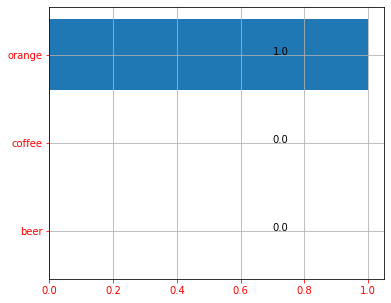

In [13]:
fig = plt.figure(figsize=(6, 5))
plt.barh(classes_values, predictionN.tolist()[0])
for index, value in zip(classes_values, predictionN.tolist()[0]):
    plt.text(0.7, index, str(round(value, 5)))
    # plt.text(value, index, str(value))
plt.tick_params(axis='x', colors='red')
plt.tick_params(axis='y', colors='red')
plt.grid()
plt.show()